# IOTID20 Binary and Multiclass classification



In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


## importing of required libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import GRU
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# prepare IOTID20 dataset


## reading CSV files

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/IoT/Binary_OverSample_Smote.csv')

## deletion of unnecessary features

In [ ]:
data=data.drop(columns=['Fwd_Pkt_Len_Std',
 'Bwd_IAT_Std',
 'Fwd_PSH_Flags',
 'Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Init_Fwd_Win_Byts',
 'Fwd_Seg_Size_Min',
 'Active_Mean',
 'Active_Std',
 'Active_Max',
 'Active_Min'])

## Encode Label features

In [ ]:
data.head()

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,...,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,1430.0,1430.0,...,982,1,1430,-1,1,75.0,0.000000,75.0,75.0,1
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,0,14600,0,2655.0,2261.327486,4254.0,1056.0,1
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,1388.0,30.0,...,0,3,2806,1869,0,70.5,0.707107,71.0,70.0,1
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,1388.0,1388.0,...,0,2,2776,1869,0,151.0,0.000000,151.0,151.0,1
4,153,2,1,886.0,420.0,452.0,434.0,443.0,420.0,420.0,...,886,1,420,-1,2,76.5,0.707107,77.0,76.0,1


# Normalization and Standardization

In [ ]:
normalized_df = (data-data.min())/(data.max()-data.min())

In [ ]:
normalized_df = normalized_df.dropna()

## separation of features (data) and Label (target)

In [ ]:
features = normalized_df.drop(columns=['Label']).to_numpy()
labels = normalized_df[['Label']].to_numpy()

In [ ]:
features.shape, labels.shape

((1170684, 51), (1170684, 1))

## Separating data into training set and testing set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((936547, 51), (234137, 51), (936547, 1), (234137, 1))

In [ ]:
X_train_cnn = np.reshape(np.array(x_train), (x_train.shape[0], x_train.shape[1],1))
X_test_cnn = np.reshape(np.array(x_test), (x_test.shape[0], x_test.shape[1],1))
print(X_train_cnn.shape)
print(X_test_cnn.shape)

(1661236, 52, 1)
(415309, 52, 1)


In [ ]:
from keras.layers import Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D,BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv1D(256, kernel_size=(3), activation='tanh', padding='same', input_shape = (x_test.shape[1], 1)))

model.add(Conv1D(128, kernel_size=(3), padding='same', activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(rate=0.2))

model.add(keras.layers.LSTM(128, activation = 'relu', return_sequences=True))
model.add(keras.layers.LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 50, 128)           384       
                                                                 
 conv1d_29 (Conv1D)          (None, 49, 64)            16448     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 49, 64)           0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 49, 64)            0         
                                                                 
 conv1d_30 (Conv1D)          (None, 48, 64)            8256      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 48, 64)           0         
 g1D)                                                 

## Train

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='nadam',metrics=['accuracy','Precision', 'Recall'])
history=model.fit(X_train_cnn, y_train, batch_size=64, epochs=10)

Epoch 1/10
3659/3659 [==============================] - 429s 113ms/step - loss: 0.4917 - accuracy: 0.7445 - precision: 0.7689 - recall: 0.6995
Epoch 2/10
3659/3659 [==============================] - 413s 113ms/step - loss: 0.3435 - accuracy: 0.8395 - precision: 0.8460 - recall: 0.8303
Epoch 3/10
3659/3659 [==============================] - 406s 111ms/step - loss: 0.2327 - accuracy: 0.8979 - precision: 0.8934 - recall: 0.9038
Epoch 4/10
3659/3659 [==============================] - 408s 112ms/step - loss: 0.2143 - accuracy: 0.9082 - precision: 0.9066 - recall: 0.9102
Epoch 5/10
3659/3659 [==============================] - 404s 111ms/step - loss: 0.2141 - accuracy: 0.9104 - precision: 0.9097 - recall: 0.9112
Epoch 6/10
3659/3659 [==============================] - 417s 114ms/step - loss: 0.1763 - accuracy: 0.9298 - precision: 0.9318 - recall: 0.9276
Epoch 7/10
3659/3659 [==============================] - 400s 109ms/step - loss: 0.1689 - accuracy: 0.9327 - precision: 0.9332 - recall: 0.9321

KeyboardInterrupt: ignored

## Evaluate

In [ ]:
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='train_acc')
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='training_loss')
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# prepare IOTID20 dataset muliclass classification


## reading CSV files

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/IoT/Cat_OverSample_Smote.csv')

## deletion of unnecessary features

In [ ]:
data=data.drop(columns=['Fwd_Pkt_Len_Std',
 'Bwd_IAT_Std',
 'Fwd_PSH_Flags',
 'Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Init_Fwd_Win_Byts',
 'Fwd_Seg_Size_Min',
 'Active_Mean',
 'Active_Std',
 'Active_Max',
 'Active_Min'])

## Encode Label features

In [ ]:
data.head(5)

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,...,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,1430.0,1430.0,...,1,1430,-1,1,75.0,0.000000,75.0,75.0,1,1
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,14600,0,2655.0,2261.327486,4254.0,1056.0,1,3
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,1388.0,30.0,...,3,2806,1869,0,70.5,0.707107,71.0,70.0,1,2
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,1388.0,1388.0,...,2,2776,1869,0,151.0,0.000000,151.0,151.0,1,1
4,153,2,1,886.0,420.0,452.0,434.0,443.0,420.0,420.0,...,1,420,-1,2,76.5,0.707107,77.0,76.0,1,1


## Normalization and Standardization

In [ ]:
normalized_df = (data-data.min())/(data.max()-data.min())

In [ ]:
normalized_df = normalized_df.dropna()

## separation of features (data) and Label (target)

In [ ]:
features = normalized_df.drop(columns=['Cat'])
labels = normalized_df[['Cat']]

In [ ]:
features.shape, labels.shape

((2076545, 51), (2076545, 2))

## Separating data into training set and testing set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1661236, 51), (415309, 51), (1661236, 2), (415309, 2))

In [ ]:
X_train_cnn = np.reshape(np.array(x_train), (1661236, 52, 1))
X_test_cnn = np.reshape(np.array(x_test), (x_test.shape[0], x_test.shape[1],1))
print(X_train_cnn.shape)
print(X_test_cnn.shape)

(1661236, 52, 1)
(415309, 52, 1)


In [ ]:
from keras.layers import Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D,BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv1D(256, kernel_size=(3), activation='tanh', padding='same', input_shape = (x_test.shape[1], 1)))

model.add(Conv1D(128, kernel_size=(3), padding='same', activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(rate=0.2))

model.add(keras.layers.LSTM(128, activation = 'relu', return_sequences=True))
model.add(keras.layers.LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())

model.add(Dense(1,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 52, 64)            256       
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 26, 64)           0         
 g1D)                                                            
                                                                 
 batch_normalization_16 (Bat  (None, 26, 64)           256       
 chNormalization)                                                
                                                                 
 lstm_16 (LSTM)              (None, 128)               98816     
                                                                 
 reshape_9 (Reshape)         (None, 128, 1)            0         
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 64, 1)          

## Train

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy','Precision', 'Recall'])
history=model.fit(X_train_cnn, np.array(y_train), batch_size=256, epochs=20)

Epoch 1/20
  11/6490 [..............................] - ETA: 1:30:11 - loss: 0.0000e+00 - accuracy: 0.1879 - precision: 0.8097 - recall: 1.0000

KeyboardInterrupt: ignored

In [ ]:
np.array(y_train)

array([[0.  ],
       [1.  ],
       [0.75],
       ...,
       [0.25],
       [0.25],
       [0.75]])

## Evaluate

In [ ]:
loss, accuracy = model.evaluate(x_test1, y_test1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

10305/10305 [==============================] - 36s 3ms/step - loss: 1.9541 - accuracy: 1.0000

Loss: 1.95, Accuracy: 100.00%


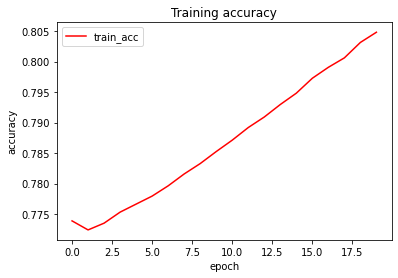

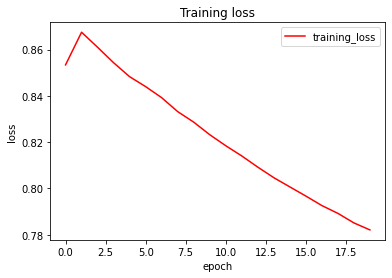

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='train_acc')
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='training_loss')
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()